In [1]:
# Jupyter notebooks have problems with imports from parent folder, so let's change the path
from jupyter_utils import change_path_to_parent
change_path_to_parent()

import matplotlib
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from first_order import AdgdAccel
from datasets import get_dataset
from loss_functions import LogisticRegression
from second_order import Newton
from quasi_newton import Bfgs, Dfp, Lbfgs, Sr1, Shorr
from utils import get_trace, relative_round

sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rc('font', family='sans-serif') 
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [2]:
A, b = get_dataset('w8a')
loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
L = loss.smoothness
l2 = 1e-7 * L
loss.l2 = l2
x0 = np.zeros(dim)
it_max = 1500

## Best quasi-Newton method

In [3]:
dfp = Dfp(loss=loss, label='DFP')
bfgs = Bfgs(loss=loss, label='BFGS')
lbfgs = Lbfgs(loss=loss, label='L-BFGS', mem_size=10)
albfgs = Lbfgs(loss=loss, label='Adaptive L-BFGS', adaptive_init=True, mem_size=10)
sr1 = Sr1(loss=loss, label='SR1')
shorr = Shorr(loss=loss, label='Shor\'s R')
newton = Newton(loss=loss, label='Newton')
markers = [',', 'o', '^', '*', 'd', 's', 'X', 'P', '.', 6, 7]
optimizers = [dfp, bfgs, lbfgs, albfgs, sr1, shorr]

Running optimizer: DFP
Running optimizer: BFGS
Running optimizer: L-BFGS
Running optimizer: Adaptive L-BFGS
Running optimizer: SR1
Running optimizer: Shor's R


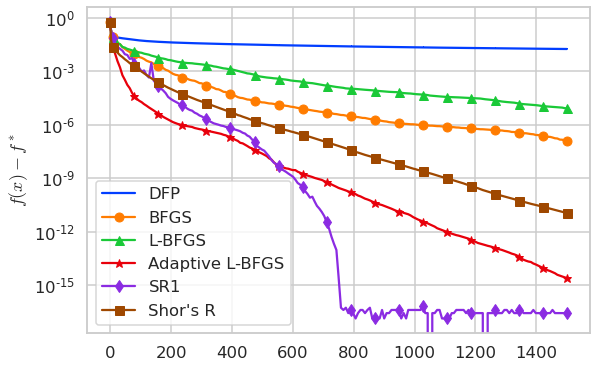

In [4]:
for opt in optimizers:
    print(f'Running optimizer: {opt.label}')
    opt.run(x0=x0, it_max=it_max)
    opt.compute_loss_of_iterates()
    
plt.figure(figsize=(9, 6))    
for opt, marker in zip(optimizers, markers):
    opt.trace.plot_losses(marker=marker)
plt.yscale('log')
plt.legend()

## Memory size of L-BFGS

### Non-adaptive L-BFGS

Running memory size: 1
Running memory size: 2
Running memory size: 3
Running memory size: 4
Running memory size: 5
Running memory size: 8
Running memory size: 64


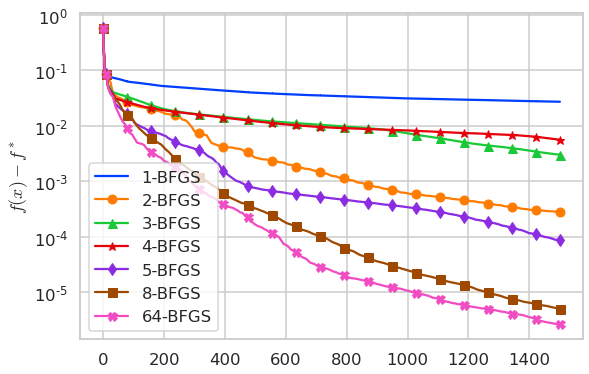

In [5]:
plt.figure(figsize=(9, 6))
mem_sizes = [1, 2, 3, 4, 5, 8, 64]
for mem_size, marker in zip(mem_sizes, markers):
    print(f'Running memory size: {mem_size}')
    opt = Lbfgs(loss=loss, label=f'{mem_size}-BFGS', mem_size=mem_size)
    opt.run(x0=x0, it_max=it_max)
    opt.compute_loss_of_iterates()
    opt.trace.plot_losses(marker=marker)
plt.yscale('log')
plt.legend()

### Adaptive L-BFGS

Running memory size: 1
Running memory size: 2
Running memory size: 3
Running memory size: 4
Running memory size: 5
Running memory size: 8
Running memory size: 64


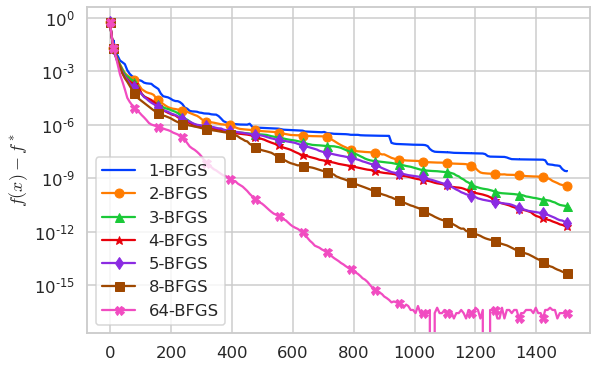

In [6]:
plt.figure(figsize=(9, 6))
for mem_size, marker in zip(mem_sizes, markers):
    print(f'Running memory size: {mem_size}')
    opt = Lbfgs(loss=loss, label=f'{mem_size}-BFGS', mem_size=mem_size, adaptive_init=True)
    opt.run(x0=x0, it_max=it_max)
    opt.compute_loss_of_iterates()
    opt.trace.plot_losses(marker=marker)
plt.yscale('log')
plt.legend()